In [31]:
import dataset_setup
import numpy as np
import matplotlib.pyplot as plt
dataset = dataset_setup.load_undergraduate_dataset()
dataset.keys()
gender = dataset.Gender.astype(np.float32)

In [13]:
weight = dataset.Weight.reshape(1,-1)
height = dataset.Height.reshape(1,-1)
BMI= weight/(height/100)**2
print(f'{BMI}{BMI.shape}')

[[25.249338 20.715693 22.038568 23.14815  23.40751  17.632652 22.06881
  22.857143 17.630856 20.761246 17.541874 19.531248 21.461939 23.371979
  23.836735 19.753088 21.22449  20.830704 19.925129 20.679014 17.306122
  24.0855   22.642193 23.14815  21.220009 20.983988 23.437498 21.484373
  20.902386 27.732298 22.093172 15.605006 19.723183 21.484373 21.296297
  22.019503 31.561674 29.387754 19.045073 21.773842 23.671255 24.96801
  24.485651 19.051975 18.812147 25.712198 22.491348 21.736506 27.471691
  35.156246 16.32653  27.160496 24.221453 18.778345 18.938776 24.33748
  30.11028  19.377161 17.301037 29.32099  24.221453 23.388685 33.802055
  17.50639  25.180786 18.359373 20.20202  18.991964 23.959093 22.981901
  20.679014 27.47475  19.723183 31.141867 22.857143 32.65306  26.346495
  21.36687  24.964945 19.591837 30.18959  19.591837 20.515087 21.977354
  20.028841 20.281233 18.51852  16.32653  23.507807 27.717686 16.796873
  20.438166 20.95661  23.938988 29.536861 20.195093 20.700817 22.15

In [22]:
X=np.concatenate((weight,height),axis=0).T
X.shape,X

((114, 2),
 array([[ 80.  , 178.  ],
        [ 62.  , 173.  ],
        [ 60.  , 165.  ],
        [ 75.  , 180.  ],
        [ 75.  , 179.  ],
        [ 54.  , 175.  ],
        [ 78.  , 188.  ],
        [ 70.  , 175.  ],
        [ 48.  , 165.  ],
        [ 60.  , 170.  ],
        [ 62.  , 188.  ],
        [ 50.  , 160.  ],
        [ 68.  , 178.  ],
        [ 69.95, 173.  ],
        [ 73.  , 175.  ],
        [ 64.  , 180.  ],
        [ 65.  , 175.  ],
        [ 66.  , 178.  ],
        [ 66.  , 182.  ],
        [ 67.  , 180.  ],
        [ 53.  , 175.  ],
        [ 77.  , 178.8 ],
        [ 75.  , 182.  ],
        [ 75.  , 180.  ],
        [ 75.  , 188.  ],
        [ 65.  , 176.  ],
        [ 60.  , 160.  ],
        [ 55.  , 160.  ],
        [ 70.  , 183.  ],
        [ 83.  , 173.  ],
        [ 70.  , 178.  ],
        [ 50.  , 179.  ],
        [ 57.  , 170.  ],
        [ 55.  , 160.  ],
        [ 69.  , 180.  ],
        [ 77.  , 187.  ],
        [100.  , 178.  ],
        [ 90.  , 175.  ],
 

In [25]:
y=BMI[0]
y

array([25.249338, 20.715693, 22.038568, 23.14815 , 23.40751 , 17.632652,
       22.06881 , 22.857143, 17.630856, 20.761246, 17.541874, 19.531248,
       21.461939, 23.371979, 23.836735, 19.753088, 21.22449 , 20.830704,
       19.925129, 20.679014, 17.306122, 24.0855  , 22.642193, 23.14815 ,
       21.220009, 20.983988, 23.437498, 21.484373, 20.902386, 27.732298,
       22.093172, 15.605006, 19.723183, 21.484373, 21.296297, 22.019503,
       31.561674, 29.387754, 19.045073, 21.773842, 23.671255, 24.96801 ,
       24.485651, 19.051975, 18.812147, 25.712198, 22.491348, 21.736506,
       27.471691, 35.156246, 16.32653 , 27.160496, 24.221453, 18.778345,
       18.938776, 24.33748 , 30.11028 , 19.377161, 17.301037, 29.32099 ,
       24.221453, 23.388685, 33.802055, 17.50639 , 25.180786, 18.359373,
       20.20202 , 18.991964, 23.959093, 22.981901, 20.679014, 27.47475 ,
       19.723183, 31.141867, 22.857143, 32.65306 , 26.346495, 21.36687 ,
       24.964945, 19.591837, 30.18959 , 19.591837, 

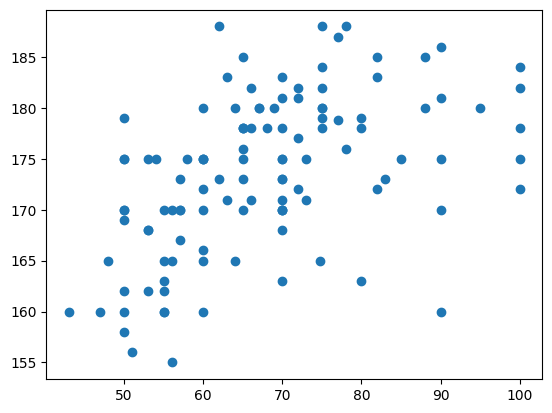

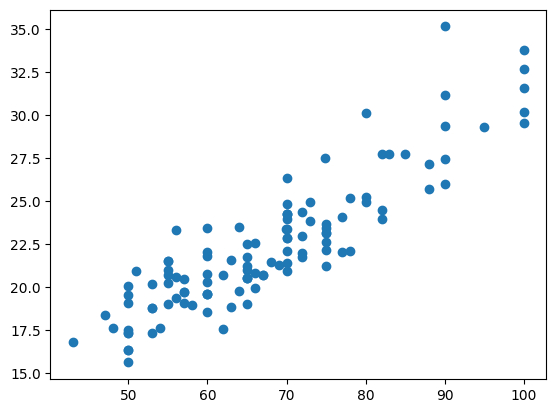

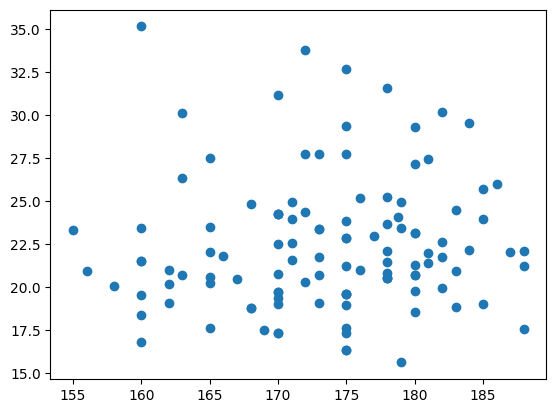

In [51]:
plt.scatter(X[:,0],X[:,1])
plt.figure()
plt.scatter(X[:,0],y)
plt.figure()
plt.scatter(X[:,1],y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(91, 2) (91,) (23, 2) (23,)


In [61]:
##1. import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


##2. 建立实例
poly_reg = Pipeline([    ###创建名为poly_reg的管道
    ("poly", PolynomialFeatures(degree = 3)),   ##第一步做多项式特征，对应一个类的实例化poly
    ("std_scaler",StandardScaler()),            ##第二步是数据归一化，对应一个类的实例化std_scaler
    ("lin_reg",LinearRegression())              ##第三步是线性回归，对应一个类的实例化lin_reg
])   

In [62]:
poly_reg.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [63]:
y_predict = poly_reg.predict(X_train)

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("训练集MSE：",mean_squared_error(y_train, y_predict))
print("测试集MSE：",mean_squared_error(y_test, poly_reg.predict(X_test)))
print("训练集R2：",r2_score(y_train, y_predict))
print("测试集R2：",r2_score(y_test, poly_reg.predict(X_test)))

训练集MSE： 1.6174607e-06
测试集MSE： 9.77617e-07
训练集R2： 0.9999998807907104
测试集R2： 0.9999999403953552
